In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
#Rydberg's constant analysis
n = [6, 5, 4, 3] #no error
wavelengths = [420e-9, 450e-9, 500e-9, 730e-9]
sig_wavelengths = 5e-9

#y = Ax
y = [1/x for x in wavelengths]
x = [(1/4) - (1/x**2) for x in n]

In [56]:
def least_squares(x, y):
    N = len(x)
    sum_x = sum(x)
    sum_x2 = sum([x[i]**2 for i in range(len(x))])
    sum_y = sum(y)
    sum_xy = sum([x[i] * y[i] for i in range(len(x))])
    
    delta = N * sum_x2 - sum_x**2
    A = (sum_x2 * sum_y - sum_x * sum_xy)/delta
    B = (N * sum_xy - sum_x * sum_y)/delta
    
    ysig = math.sqrt(abs((1/(N - 2)) * sum([(y[i] - A - B*x[i])**2 for i in range(len(x))])))
    A_sig = ysig * math.sqrt(sum_x2/delta)
    B_sig = ysig * math.sqrt(N/delta)
        
    return A, B, B_sig

A, B, B_err = least_squares(x, y)
print(B, B_err)

12059312.893342225 428599.2812278644


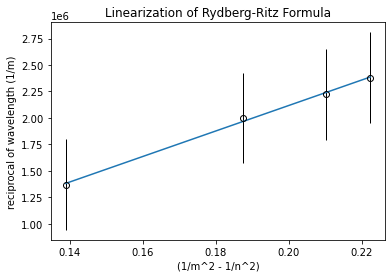

In [58]:
axis = [A + B * x[i] for i in range(len(x))]

fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(len(x)):
    ax.errorbar(x[i], y[i], yerr=B_err, ecolor='black', elinewidth=1, marker='o', color='black', fillstyle='none')

ax.plot(x, axis)
ax.set_title('Linearization of Rydberg-Ritz Formula')
ax.set_xlabel('(1/m^2 - 1/n^2)')
ax.set_ylabel('reciprocal of wavelength (1/m)')
plt.savefig('phys292_rydberg_constant', bbox_inches='tight')